###import libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
filename = './afternoon/tweets.json'


###read in twitter data from jason file

In [2]:
with open(filename, 'r') as f:
    l = f.readlines()

data = [json.loads(s) for s in l]
df = pd.DataFrame(data)

In [10]:
df.shape

(75796, 30)

In [3]:
df[~df.place.isnull()].place.tolist()[0]

{u'attributes': {},
 u'bounding_box': {u'coordinates': [[[-122.514926, 37.708075],
    [-122.514926, 37.833238],
    [-122.357031, 37.833238],
    [-122.357031, 37.708075]]],
  u'type': u'Polygon'},
 u'country': u'United States',
 u'country_code': u'US',
 u'full_name': u'San Francisco, CA',
 u'id': u'5a110d312052166f',
 u'name': u'San Francisco',
 u'place_type': u'city',
 u'url': u'https://api.twitter.com/1.1/geo/id/5a110d312052166f.json'}

###new dataframe where coordinates are present

In [4]:
new_df = df[~df.coordinates.isnull()]

In [5]:
chatter_coordinate_df = new_df[['coordinates', 'text']]
chatter = new_df.text.tolist()

In [6]:
chat_test = chatter[0:5]

###experiment: clearn chatter 

In [7]:
import re

In [8]:
def clean_tweets_conservative(chatter):
    cleaned_tweets = []
    for line in chatter:
        tweet = re.findall(r'[A-Za-z][,\w!.]+', line)
        clean_tweet= ' '.join(tweet)
        cleaned_tweets.append(clean_tweet)
    return cleaned_tweets

In [9]:
def clean_tweets_liberal(chatter):
    cleaned_tweets = []
    for line in chatter:
        match = re.search(r'[A-Za-z][,\w!. ]+', line)
        if match:
            cleaned_tweets.append(match.group())
        else:
            cleaned_tweets.append(' ')
    return cleaned_tweets

In [10]:
cleaned_tweets = clean_tweets_liberal(chatter)

In [11]:
cleaned_tweets[80:100]

[u'Opponents of arena accuse mayor of misleading public on ',
 u'it is not often i get to eat korean food and when i do, i always get surprised when they bring out',
 u'its99Percent Fav if you are going to reply to my Direct Message right now! .. It',
 u'http',
 u'happy the day is over aka ',
 u'Yo bitch gotta fat ass ima do her ',
 u'Had to slide through the bros ',
 u'So much quality time with so many great ',
 u'lagunaseca ',
 u'Night crawling line is getting longer!!!! ',
 u'Sufferin',
 u'OhMarGosh101 omg stfu LOLOL',
 u'So gorgeous. Love n miss you guys so much! RT ',
 u'Happy ',
 u'One of my favorite butterflies, or three of them rather ',
 u'babybird ',
 u'Absolutely love these Lincoln Center ResLife ladies! ',
 u'm always on the hunt for the next best extension... Digital ',
 u'USGS reports a M1.54 ',
 u'USGS reports a M1.54 ']

In [12]:
coor = [d['coordinates'] for d in df[~df.coordinates.isnull()].coordinates.tolist()]

###Data of Coordinates 

In [19]:
coor[0]  #lat, long pair

[-121.799, 37.3147]

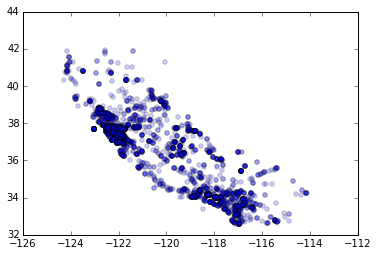

In [16]:
lons = [c[0] for c in coor]
lats = [c[1] for c in coor]

plt.scatter(lons, lats, alpha=.2)
plt.show()

In [34]:
len(sf_lat)

92

got a california data set from the itnernet
 - West_Bounding_Coordinate: -124.875453
 - East_Bounding_Coordinate: -120.464711
 - North_Bounding_Coordinate: 39.652123
 - South_Bounding_Coordinate: 36.285549

#Test with gmplot: don't use this. 

In [66]:
import gmplot


tutorial from the internet:
This works, but the file is HUGE and I wonder about how interactive it is..

In [63]:
gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 15)

gmap.plot([39.652123, 36.285549], [-120.464711,-124.875453], 'cornflowerblue', edge_width=10)
gmap.scatter(lats, lons, '#FFA500', size=80, marker=False)
#gmap.scatter(sf_lat, sf_long, 'k', marker=True)
#gmap.heatmap(sf_lat, sf_long)

gmap.draw("./afternoon/test_maps/test_5.html")


#Play with Bokeh

proof that hover works: 

In [13]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file("toolbar.html")

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

##This works: Scatterplot and hover

In [175]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file("sayin stuff.html")

source = ColumnDataSource(
        data=dict(
            x=lons,
            y=lats,
            tweet_snippet=cleaned_tweets,
        )
    )

hover = HoverTool(
        tooltips=[
            ("tweet_snippet", "@tweet_snippet"),
        ]
    )

p = figure(plot_width=800, plot_height=800, tools=[hover],
           title="twitter prattle in the bay over the weekend")

p.circle('x', 'y', size=10, source=source)

show(p)

In [15]:
from bokeh.models import GMapPlot, GMapOptions, Range1d 
from bokeh.models.glyphs import Circle


#code lifted from example

In [14]:
from bokeh.browserlib import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models.glyphs import Circle
from bokeh.models import (
    GMapPlot, Range1d, ColumnDataSource, LinearAxis,
    PanTool, WheelZoomTool, BoxSelectTool,
    BoxSelectionOverlay, GMapOptions,
    NumeralTickFormatter, PrintfTickFormatter)
from bokeh.resources import INLINE

#Oh boy! This kind of works!

In [21]:


x_range = Range1d()
y_range = Range1d()


# JSON style string taken from: https://snazzymaps.com/style/1/pale-dawn
map_options = GMapOptions(lat=37.75, lng=-122.45, map_type="roadmap", zoom=12, styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title = "SfMaybe"
)

source = ColumnDataSource(
    data=dict(
        lat=lats,
        lon=lons,
        
    )
)

circle = Circle(x="lon", y="lat", size=3, fill_color="blue", line_color="blue")
plot.add_glyph(source, circle)

pan = PanTool()
wheel_zoom = WheelZoomTool()
box_select = BoxSelectTool()

plot.add_tools(pan, wheel_zoom, box_select)

xaxis = LinearAxis(axis_label="lat", major_tick_in=0, formatter=NumeralTickFormatter(format="0.000"))
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis(axis_label="lon", major_tick_in=0, formatter=PrintfTickFormatter(format="%.3f"))
plot.add_layout(yaxis, 'left')

overlay = BoxSelectionOverlay(tool=box_select)
plot.add_layout(overlay)

show(plot)

#OKAY THIS WORKS HORRAH

In [17]:
x_range = Range1d()
y_range = Range1d()


# JSON style string taken from: https://snazzymaps.com/style/1/pale-dawn
map_options = GMapOptions(lat=37.75, lng=-122.45, map_type="roadmap", zoom=12, styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title = "things someone tweeted this weeekend"
)

source = ColumnDataSource(
    data=dict(
        lat=lats,
        lon=lons,
        tweet_snippet=cleaned_tweets,
    )
)

circle = Circle(x="lon", y="lat", size=3, fill_color="blue", line_color="blue")
plot.add_glyph(source, circle)

pan = PanTool()
wheel_zoom = WheelZoomTool()
box_select = BoxSelectTool()
hover = HoverTool(
        tooltips=[
            ("tweet_snippet", "@tweet_snippet"),
        ]
    )

plot.add_tools(pan, wheel_zoom, box_select, hover)

xaxis = LinearAxis(axis_label="lat", major_tick_in=0, formatter=NumeralTickFormatter(format="0.000"))
plot.add_layout(xaxis, 'below')

yaxis = LinearAxis(axis_label="lon", major_tick_in=0, formatter=PrintfTickFormatter(format="%.3f"))
plot.add_layout(yaxis, 'left')

overlay = BoxSelectionOverlay(tool=box_select)
plot.add_layout(overlay)

show(plot)

Isaac says things: soap spline, constrained on the edges but bubbles in the middle 

 - simon wood in R does all the spline stuff. 
 - So he has done all the R research 
 
GAM : generalized addative model

some splines / gams in the statistical learning textbook

#Extra Notes from Class that this may have been helpful

 - seattle crime data: categories.  
        - police calls with respect to being stuck in an elevator 
        - cartodb  !!!! This library looks really cool and nice. Maybe its better. hahn and logan
        - plotted getting stuck in elevators by day of week, when people stuck in an elevator 
        
 -  Lee:
    - filtering by hashtags on instagram. did a quantification of the number of people with a hastag. hover is the numer of times they used tatoos
    
- google earth: can do a lot of search stuff and overlay. good tool to keep in mind. 

- magic.import.io for easy scraping on the internet
        